In [ ]:
import numpy as np
import imageio.v2 as imageio
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# 1.
### Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [ ]:
X1 = np.random.randint(0, 1, (110, 100))

In [ ]:
X2 = np.random.randint(0, 1, (1000, 1100))

In [ ]:
X3 = np.random.randint(0, 1, (10000, 11000))

In [ ]:
timings = np.zeros((3, 3))

## 1.1.

In [ ]:
%%timeit -o
np.diag(X1).prod(where = np.diag(X1) != 0)

20.3 µs ± 165 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 20.3 µs ± 165 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 0] = _.average

In [ ]:
%%timeit -o
np.diag(X2).prod(where = np.diag(X2) != 0)

24.1 µs ± 195 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 24.1 µs ± 195 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 1] = _.average

In [ ]:
%%timeit -o
np.diag(X3).prod(where = np.diag(X3) != 0)

79.2 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 79.2 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 2] = _.average

## 1.2.

In [ ]:
%%timeit -o
res = 1
for i in range(min(X1.shape)):
    if X1[i, i] != 0:
        res *= X1[i, i]
res

34 µs ± 887 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 34 µs ± 887 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[1, 0] = _.average

In [ ]:
%%timeit -o
res = 1
for i in range(min(X2.shape)):
    if X2[i, i] != 0:
        res *= X2[i, i]
res

353 µs ± 3.92 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 353 µs ± 3.92 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
timings[1, 1] = _.average

In [ ]:
%%timeit -o
res = 1
for i in range(min(X3.shape)):
    if X3[i, i] != 0:
        res *= X3[i, i]
res

3.88 ms ± 269 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 3.88 ms ± 269 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [ ]:
timings[1, 2] = _.average

## 1.3.

In [ ]:
%%timeit -o
res = 1
for i in np.diag(X1):
    if i != 0:
        res *= i
res

24.9 µs ± 448 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 24.9 µs ± 448 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[2, 0] = _.average

In [ ]:
%%timeit -o
res = 1
for i in np.diag(X2):
    if i != 0:
        res *= i
res

185 µs ± 762 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 185 µs ± 762 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[2, 1] = _.average

In [ ]:
%%timeit -o
res = 1
for i in np.diag(X3):
    if i != 0:
        res *= i
res

1.8 ms ± 30.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 1.8 ms ± 30.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
timings[2, 2] = _.average

## Графики времени выполнения

In [ ]:
timings

array([[2.02885714e-05, 2.41142857e-05, 7.92257143e-05],
       [3.40257143e-05, 3.53471428e-04, 3.88271429e-03],
       [2.48642857e-05, 1.85008571e-04, 1.79762857e-03]])

<Figure size 640x480 with 0 Axes>

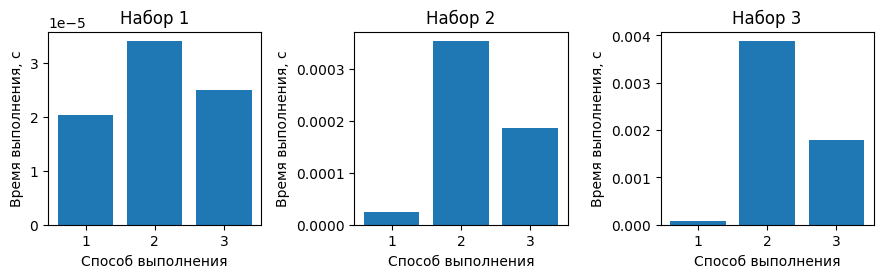

In [ ]:
plt.figure()

plt.figure(figsize=(12, 10))
for category_num in range(1, 4):
    plt.subplot(4, 4, category_num)
    plt.bar(range(1, 4), timings[:, category_num-1])
    plt.ylabel("Время выполнения, с")
    plt.xlabel("Способ выполнения")
    plt.title('Набор {}'.format(category_num))

plt.tight_layout()
plt.show()

# 2.
### Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

In [ ]:
timings = np.zeros((3, 3))

In [ ]:
X1 = np.random.randint(0, 1, (100, 100))
X2 = np.random.randint(0, 1, (1000, 1000))
X3 = np.random.randint(0, 1, (10000, 10000))

In [ ]:
i1 = np.random.randint(0, 99, 99)
j1 = np.random.randint(0, 99, 99)

i2 = np.random.randint(0, 999, 999)
j2 = np.random.randint(0, 999, 999)

i3 = np.random.randint(0, 9999, 9999)
j3 = np.random.randint(0, 9999, 9999)

## 2.1.

In [ ]:
%%timeit -o
np.array(X1[i1, j1]);

2.85 µs ± 18.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


<TimeitResult : 2.85 µs ± 18.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)>

In [ ]:
timings[0, 0] = _.average

In [ ]:
%%timeit -o
np.array(X2[i2, j2]);

8.98 µs ± 58.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


<TimeitResult : 8.98 µs ± 58.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)>

In [ ]:
timings[0, 1] = _.average

In [ ]:
%%timeit -o
np.array(X3[i3, j3]);

105 µs ± 696 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 105 µs ± 696 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 2] = _.average

## 2.2.

In [ ]:
%%timeit -o
res = []
for k in range(0, X1.shape[0]-1):
    res.append(X1[i1[k], j1[k]])

87.8 µs ± 966 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 87.8 µs ± 966 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[1, 0] = _.average

In [ ]:
%%timeit -o
res = []
for k in range(0, X2.shape[0]-1):
    res.append(X2[i2[k], j2[k]])

1 ms ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 1 ms ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
timings[1, 1] = _.average

In [ ]:
%%timeit -o
res = []
for k in range(0, X3.shape[0]-1):
    res.append(X3[i3[k], j3[k]])

11 ms ± 410 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 11 ms ± 410 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [ ]:
timings[1, 2] = _.average

## 2.3.

In [ ]:
%%timeit -o
np.array([X1[i1[k], j1[k]] for k in range(0, X1.shape[0]-1)]);

75.2 µs ± 1.92 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 75.2 µs ± 1.92 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[2, 0] = _.average

In [ ]:
%%timeit -o
np.array([X2[i2[k], j2[k]] for k in range(0, X2.shape[0]-1)]);

832 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 832 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
timings[2, 1] = _.average

In [ ]:
%%timeit -o
np.array([X3[i3[k], j3[k]] for k in range(0, X3.shape[0]-1)]);

9.56 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 9.56 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [ ]:
timings[2, 2] = _.average

## Графики времени выполнения

In [ ]:
timings

array([[2.85242857e-06, 8.98042857e-06, 1.04637143e-04],
       [8.78042857e-05, 1.00237143e-03, 1.10325714e-02],
       [7.51671429e-05, 8.32371429e-04, 9.56242857e-03]])

<Figure size 640x480 with 0 Axes>

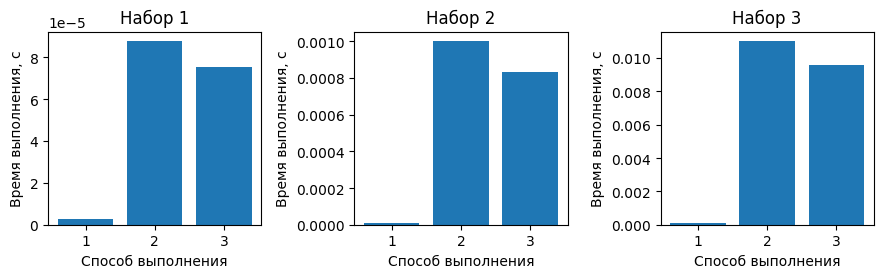

In [ ]:
plt.figure()

plt.figure(figsize=(12, 10))
for category_num in range(1, 4):
    plt.subplot(4, 4, category_num)
    plt.bar(range(1, 4), timings[:, category_num-1])
    plt.ylabel("Время выполнения, с")
    plt.xlabel("Способ выполнения")
    plt.title('Набор {}'.format(category_num))

plt.tight_layout()
plt.show()

# 3.
### Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [ ]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])

In [ ]:
x1 = np.random.randint(0, 9, 100)
y1 = np.random.randint(0, 9, 100)

x2 = np.random.randint(0, 9, 1000)
y2 = np.random.randint(0, 9, 1000)

x3 = np.random.randint(0, 9, 10000)
y3 = np.random.randint(0, 9, 10000)

In [ ]:
timings = np.zeros((3, 3))

## 3.1.

In [ ]:
%%timeit -o
np.setdiff1d(x1, y1).size == 0;

70 µs ± 972 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 70 µs ± 972 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 0] = _.average

In [ ]:
%%timeit -o
np.setdiff1d(x2, y2).size == 0;

105 µs ± 840 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 105 µs ± 840 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 1] = _.average

In [ ]:
%%timeit -o
np.setdiff1d(x3, y3).size == 0;

470 µs ± 7.98 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 470 µs ± 7.98 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
timings[0, 2] = _.average

## 3.2.

In [ ]:
%%timeit -o
res = True
checked = []
for i in range(0, x1.size):
    if x1[i] not in checked:
        x_count = 0
        y_count = 0
        # counting elements in x
        for j in range(i, x1.size):
            if x1[i] == x1[j]:
                x_count += 1
        # counting elements in y
        for j in range(i, y1.size):
            if y1[i] == y1[j]:
                y_count += 1
        # if number of same elements not equal then not multiset
        if x_count != y_count:
            res = False
            break

82.1 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 82.1 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[1, 0] = _.average

In [ ]:
%%timeit -o
res = True
checked = []
for i in range(0, x2.size):
    if x2[i] not in checked:
        x_count = 0
        y_count = 0
        # counting elements in x
        for j in range(i, x2.size):
            if x2[i] == x2[j]:
                x_count += 1
        # counting elements in y
        for j in range(i, y2.size):
            if y2[i] == y2[j]:
                y_count += 1
        # if number of same elements not equal then not multiset
        if x_count != y_count:
            res = False
            break

854 µs ± 7.69 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 854 µs ± 7.69 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
timings[1, 1] = _.average

In [ ]:
%%timeit -o
res = True
checked = []
for i in range(0, x3.size):
    if x3[i] not in checked:
        x_count = 0
        y_count = 0
        # counting elements in x
        for j in range(i, x3.size):
            if x3[i] == x3[j]:
                x_count += 1
        # counting elements in y
        for j in range(i, y3.size):
            if y3[i] == y3[j]:
                y_count += 1
        # if number of same elements not equal then not multiset
        if x_count != y_count:
            res = False
            break

8.96 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 8.96 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [ ]:
timings[1, 2] = _.average

## 3.3.

In [ ]:
%%timeit -o
uni = np.unique(x1)
res = True
for i in uni:
    if np.sum(x1 == i) != np.sum(y1 == i):
        res = False
        break

42.8 µs ± 309 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 42.8 µs ± 309 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[2, 0] = _.average

In [ ]:
%%timeit -o
uni = np.unique(x2)
res = True
for i in uni:
    if np.sum(x2 == i) != np.sum(y2 == i):
        res = False
        break

59 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 59 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[2, 1] = _.average

In [ ]:
%%timeit -o
uni = np.unique(x3)
res = True
for i in uni:
    if np.sum(x3 == i) != np.sum(y3 == i):
        res = False
        break

263 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 263 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
timings[2, 2] = _.average

## Графики времени выполнения

In [ ]:
timings

array([[7.00442857e-05, 1.04868571e-04, 4.70471428e-04],
       [8.20600000e-05, 8.54057143e-04, 8.95871428e-03],
       [4.28214286e-05, 5.89685714e-05, 2.63042857e-04]])

<Figure size 640x480 with 0 Axes>

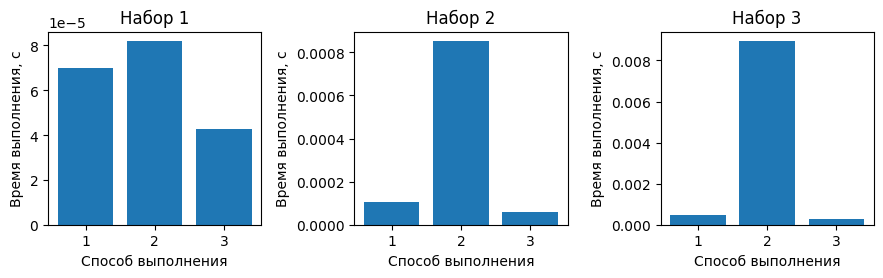

In [ ]:
plt.figure()

plt.figure(figsize=(12, 10))
for category_num in range(1, 4):
    plt.subplot(4, 4, category_num)
    plt.bar(range(1, 4), timings[:, category_num-1])
    plt.ylabel("Время выполнения, с")
    plt.xlabel("Способ выполнения")
    plt.title('Набор {}'.format(category_num))

plt.tight_layout()
plt.show()

# 4.
### Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [ ]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

In [ ]:
x1 = np.random.randint(0, 9, 100)
x2 = np.random.randint(0, 9, 1000)
x3 = np.random.randint(0, 9, 10000)

In [ ]:
timings = np.zeros((3, 3))

## 4.1.

In [ ]:
%%timeit -o
np.max(x1[np.where(x1[:-1] == 0)[0] + 1]);

18.6 µs ± 133 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 18.6 µs ± 133 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 0] = _.average

In [ ]:
%%timeit -o
np.max(x2[np.where(x2[:-1] == 0)[0] + 1]);

20.6 µs ± 385 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 20.6 µs ± 385 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 1] = _.average

In [ ]:
%%timeit -o
np.max(x3[np.where(x3[:-1] == 0)[0] + 1]);

34.5 µs ± 142 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 34.5 µs ± 142 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 2] = _.average

## 4.2.

In [ ]:
%%timeit -o
m = -1
for i in range(x1.size - 1):
    if x1[i] == 0:
        if x1[i+1] > m:
            m = x1[i+1]

26.3 µs ± 296 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 26.3 µs ± 296 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[1, 0] = _.average

In [ ]:
%%timeit -o
m = -1
for i in range(x2.size - 1):
    if x2[i] == 0:
        if x2[i+1] > m:
            m = x2[i+1]

300 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 300 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
timings[1, 1] = _.average

In [ ]:
%%timeit -o
m = -1
for i in range(x3.size - 1):
    if x3[i] == 0:
        if x3[i+1] > m:
            m = x3[i+1]

3.09 ms ± 29.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 3.09 ms ± 29.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [ ]:
timings[1, 2] = _.average

## 4.3.

In [ ]:
%%timeit -o
mask = x1 == 0
mask = np.roll(mask, 1)
mask[0] = False
np.max(x1[mask]);

46.7 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 46.7 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[2, 0] = _.average

In [ ]:
%%timeit -o
mask = x2 == 0
mask = np.roll(mask, 1)
mask[0] = False
np.max(x2[mask]);

49.8 µs ± 259 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 49.8 µs ± 259 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[2, 1] = _.average

In [ ]:
%%timeit -o
mask = x3 == 0
mask = np.roll(mask, 1)
mask[0] = False
np.max(x3[mask]);

78.8 µs ± 906 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 78.8 µs ± 906 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[2, 2] = _.average

## Графики времени выполнения

In [ ]:
timings

array([[1.85857143e-05, 2.06214286e-05, 3.45000000e-05],
       [2.62514286e-05, 3.00414286e-04, 3.09457143e-03],
       [4.67071429e-05, 4.98471429e-05, 7.87785714e-05]])

<Figure size 640x480 with 0 Axes>

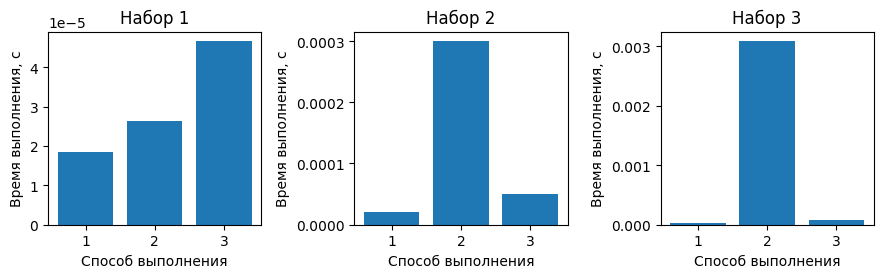

In [ ]:
plt.figure()

plt.figure(figsize=(12, 10))
for category_num in range(1, 4):
    plt.subplot(4, 4, category_num)
    plt.bar(range(1, 4), timings[:, category_num-1])
    plt.ylabel("Время выполнения, с")
    plt.xlabel("Способ выполнения")
    plt.title('Набор {}'.format(category_num))

plt.tight_layout()
plt.show()

# 5.
### Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

In [ ]:
# scipy.misc.imread was replaced by imageio.imread
a1 = imageio.imread("car10.png")
a2 = imageio.imread("car100.png")
a3 = imageio.imread("car1000.png")

In [ ]:
timings = np.zeros((3, 3))

## 5.1.

In [ ]:
%%timeit -o
np.dot(a1[...,:3], [0.299, 0.587, 0.114]);

19.7 µs ± 403 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 19.7 µs ± 403 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 0] = _.average

In [ ]:
%%timeit -o
np.dot(a2[...,:3], [0.299, 0.587, 0.114]);

295 µs ± 5.58 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 295 µs ± 5.58 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
timings[0, 1] = _.average

In [ ]:
%%timeit -o
np.dot(a3[...,:3], [0.299, 0.587, 0.114]);

28.1 ms ± 501 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 28.1 ms ± 501 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [ ]:
timings[0, 2] = _.average

## 5.2.

In [ ]:
%%timeit -o
gray_img2 = []
row = []
for i in range(a1.shape[0]):
    for j in range(a1.shape[1]):
        row.append(a1[i, j, 0]*0.299 + a1[i, j, 1]*0.587 + a1[i, j, 2]*0.114)
    gray_img2.append(row)
    row = []

902 µs ± 6.92 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 902 µs ± 6.92 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
timings[1, 0] = _.average

In [ ]:
%%timeit -o
gray_img2 = []
row = []
for i in range(a2.shape[0]):
    for j in range(a2.shape[1]):
        row.append(a2[i, j, 0]*0.299 + a2[i, j, 1]*0.587 + a2[i, j, 2]*0.114)
    gray_img2.append(row)
    row = []

89.7 ms ± 1.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 89.7 ms ± 1.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [ ]:
timings[1, 1] = _.average

In [ ]:
%%timeit -o
gray_img2 = []
row = []
for i in range(a3.shape[0]):
    for j in range(a3.shape[1]):
        row.append(a3[i, j, 0]*0.299 + a3[i, j, 1]*0.587 + a3[i, j, 2]*0.114)
    gray_img2.append(row)
    row = []

8.96 s ± 55.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 8.96 s ± 55.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [ ]:
timings[1, 2] = _.average

## 5.3.

In [ ]:
%%timeit -o
gray_img3 = np.zeros((a1.shape[0], a1.shape[1]))
for i in range(a1.shape[0]):
    gray_img3[i] = np.dot(a1[i,:,:3], [0.299, 0.587, 0.114])

179 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 179 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[2, 0] = _.average

In [ ]:
%%timeit -o
gray_img3 = np.zeros((a2.shape[0], a2.shape[1]))
for i in range(a2.shape[0]):
    gray_img3[i] = np.dot(a2[i,:,:3], [0.299, 0.587, 0.114])

2.05 ms ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 2.05 ms ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [ ]:
timings[2, 1] = _.average

In [ ]:
%%timeit -o
gray_img3 = np.zeros((a3.shape[0], a3.shape[1]))
for i in range(a3.shape[0]):
    gray_img3[i] = np.dot(a3[i,:,:3], [0.299, 0.587, 0.114])

46.5 ms ± 525 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 46.5 ms ± 525 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [ ]:
timings[2, 2] = _.average

## Графики времени выполнения

In [ ]:
timings

array([[1.96500000e-05, 2.95057143e-04, 2.81100000e-02],
       [9.02314286e-04, 8.97300000e-02, 8.96125714e+00],
       [1.79485714e-04, 2.05028571e-03, 4.65414286e-02]])

<Figure size 640x480 with 0 Axes>

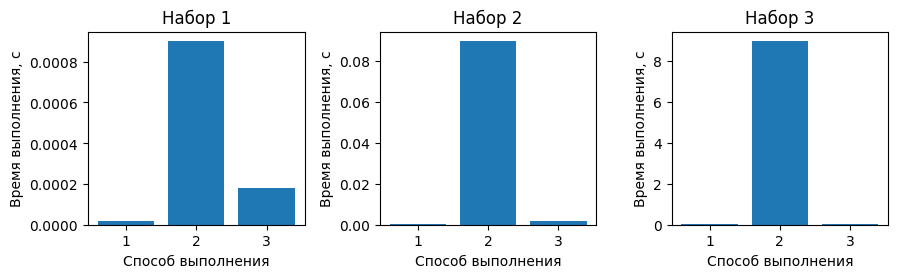

In [ ]:
plt.figure()

plt.figure(figsize=(12, 10))
for category_num in range(1, 4):
    plt.subplot(4, 4, category_num)
    plt.bar(range(1, 4), timings[:, category_num-1])
    plt.ylabel("Время выполнения, с")
    plt.xlabel("Способ выполнения")
    plt.title('Набор {}'.format(category_num))

plt.tight_layout()
plt.show()

# 6.
### Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2]). Ответ: (np.array([2, 3, 5, 2]), np.array([3, 3, 1, 2])).

In [ ]:
x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2])

In [ ]:
x1 = np.random.randint(0, 2, 100)
x2 = np.random.randint(0, 2, 1000)
x3 = np.random.randint(0, 2, 10000)

In [ ]:
timings = np.zeros((3, 3))

## 6.1.

In [ ]:
%%timeit -o
# works with args >= 0
new_x = np.append(x1, -1)
new_x[np.where((np.diff(new_x) != 0))], np.diff(np.insert(np.where((np.diff(new_x) != 0)), 0, -1));

98.9 µs ± 773 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 98.9 µs ± 773 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 0] = _.average

In [ ]:
%%timeit -o
# works with args >= 0
new_x = np.append(x2, -1)
new_x[np.where((np.diff(new_x) != 0))], np.diff(np.insert(np.where((np.diff(new_x) != 0)), 0, -1));

110 µs ± 960 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 110 µs ± 960 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 1] = _.average

In [ ]:
%%timeit -o
# works with args >= 0
new_x = np.append(x3, -1)
new_x[np.where((np.diff(new_x) != 0))], np.diff(np.insert(np.where((np.diff(new_x) != 0)), 0, -1));

155 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 155 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 2] = _.average

## 6.2.

In [ ]:
%%timeit -o
res = ([], [])
prev = x1[0]
count = 0
for i in x1:
    if i == prev:
        count += 1
        continue
    res[0].append(prev)
    res[1].append(count)
    count = 1
    prev = i
res[0].append(prev)
res[1].append(count);

44.4 µs ± 734 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 44.4 µs ± 734 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[1, 0] = _.average

In [ ]:
%%timeit -o
res = ([], [])
prev = x2[0]
count = 0
for i in x2:
    if i == prev:
        count += 1
        continue
    res[0].append(prev)
    res[1].append(count)
    count = 1
    prev = i
res[0].append(prev)
res[1].append(count);

417 µs ± 5.59 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 417 µs ± 5.59 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
timings[1, 1] = _.average

In [ ]:
%%timeit -o
res = ([], [])
prev = x3[0]
count = 0
for i in x3:
    if i == prev:
        count += 1
        continue
    res[0].append(prev)
    res[1].append(count)
    count = 1
    prev = i
res[0].append(prev)
res[1].append(count);

4.27 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 4.27 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [ ]:
timings[1, 2] = _.average

## 6.3.

In [ ]:
%%timeit -o
res = np.array([], dtype=int)
prev = x1[0]
count = 0
for i in x1:
    if i == prev:
        count += 1
        continue
    res = np.append(res, (prev, count))
    count = 1
    prev = i
res = np.append(res, (prev, count))
res[0::2], res[1::2]

573 µs ± 6.42 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 573 µs ± 6.42 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [ ]:
timings[2, 0] = _.average

In [ ]:
%%timeit -o
res = np.array([], dtype=int)
prev = x2[0]
count = 0
for i in x2:
    if i == prev:
        count += 1
        continue
    res = np.append(res, (prev, count))
    count = 1
    prev = i
res = np.append(res, (prev, count))
res[0::2], res[1::2]

6.08 ms ± 62.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 6.08 ms ± 62.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [ ]:
timings[2, 1] = _.average

In [ ]:
%%timeit -o
res = np.array([], dtype=int)
prev = x3[0]
count = 0
for i in x3:
    if i == prev:
        count += 1
        continue
    res = np.append(res, (prev, count))
    count = 1
    prev = i
res = np.append(res, (prev, count))
res[0::2], res[1::2]

64.7 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 64.7 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [ ]:
timings[2, 2] = _.average

## Графики времени выполнения

In [ ]:
timings

array([[9.89157143e-05, 1.10084286e-04, 1.55022857e-04],
       [4.43557143e-05, 4.17171429e-04, 4.27028571e-03],
       [5.73028571e-04, 6.07714286e-03, 6.47057143e-02]])

<Figure size 640x480 with 0 Axes>

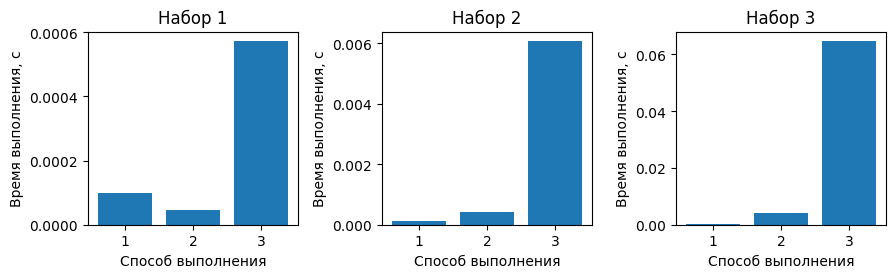

In [ ]:
plt.figure()

plt.figure(figsize=(12, 10))
for category_num in range(1, 4):
    plt.subplot(4, 4, category_num)
    plt.bar(range(1, 4), timings[:, category_num-1])
    plt.ylabel("Время выполнения, с")
    plt.xlabel("Способ выполнения")
    plt.title('Набор {}'.format(category_num))

plt.tight_layout()
plt.show()

# 7.
### Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist.

In [ ]:
X1 = np.random.randint(0, 100, (100, 2))
Y1 = np.random.randint(0, 100, (100, 2))

X2 = np.random.randint(0, 100, (1000, 2))
Y2 = np.random.randint(0, 100, (1000, 2))

X3 = np.random.randint(0, 100, (10000, 2))
Y3 = np.random.randint(0, 100, (10000, 2))

In [ ]:
timings = np.zeros((3, 3))

## 7.1.

In [ ]:
%%timeit -o
cdist(X1, Y1, 'euclidean');

22.2 µs ± 160 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 22.2 µs ± 160 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [ ]:
timings[0, 0] = _.average

In [ ]:
%%timeit -o
cdist(X2, Y2, 'euclidean');

3.36 ms ± 194 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 3.36 ms ± 194 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [ ]:
timings[0, 1] = _.average

In [ ]:
%%timeit -o
cdist(X3, Y3, 'euclidean');

370 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 370 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [ ]:
timings[0, 2] = _.average

## 7.2.

In [ ]:
def dist(a, b):
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5

In [ ]:
%%timeit -o
distances2 = np.zeros((X1.shape[0], X1.shape[0]))
for i in range(X1.shape[0]):
    for j in range(X1.shape[0]):
        distances2[i, j] = dist(X1[i], Y1[j])

27.6 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 27.6 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [ ]:
timings[1, 0] = _.average

In [ ]:
%%timeit -o
distances2 = np.zeros((X2.shape[0], X2.shape[0]))
for i in range(X2.shape[0]):
    for j in range(X2.shape[0]):
        distances2[i, j] = dist(X2[i], Y2[j])

2.79 s ± 47.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 2.79 s ± 47.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [ ]:
timings[1, 1] = _.average

In [ ]:
%%timeit -r 1 -o
distances2 = np.zeros((X3.shape[0], X3.shape[0]))
for i in range(X3.shape[0]):
    for j in range(X3.shape[0]):
        distances2[i, j] = dist(X3[i], Y3[j])

4min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 4min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [ ]:
timings[1, 2] = _.average

## 7.3.

In [ ]:
%%timeit -o
distances3 = np.zeros((X1.shape[0], X1.shape[0]))
for i in range(X1.shape[0]):
    for j in range(X1.shape[0]):
        distances3[i, j] = np.linalg.norm(X1[i]-Y1[j])

48.4 ms ± 874 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 48.4 ms ± 874 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [ ]:
timings[2, 0] = _.average

In [ ]:
%%timeit -o
distances3 = np.zeros((X2.shape[0], X2.shape[0]))
for i in range(X2.shape[0]):
    for j in range(X2.shape[0]):
        distances3[i, j] = np.linalg.norm(X2[i]-Y2[j])

4.75 s ± 48.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 4.75 s ± 48.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [ ]:
timings[2, 1] = _.average

In [ ]:
%%timeit -r 1 -o
distances3 = np.zeros((X3.shape[0], X3.shape[0]))
for i in range(X3.shape[0]):
    for j in range(X3.shape[0]):
        distances3[i, j] = np.linalg.norm(X3[i]-Y3[j])

7min 53s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 7min 53s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [ ]:
timings[2, 2] = _.average

## Графики времени выполнения

In [ ]:
timings

array([[2.22442571e-05, 3.36349157e-03, 3.69653743e-01],
       [2.75808800e-02, 2.79336203e+00, 2.80407963e+02],
       [4.83808486e-02, 4.75477801e+00, 4.73390798e+02]])

<Figure size 640x480 with 0 Axes>

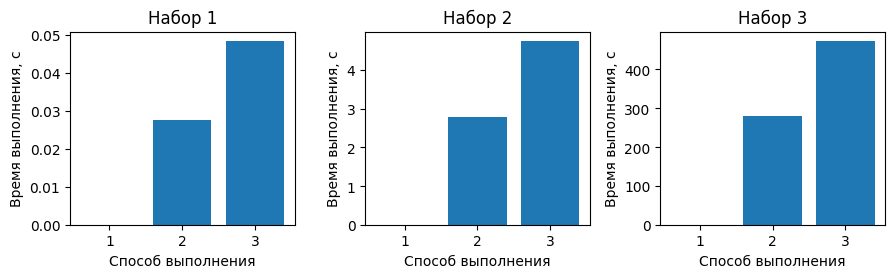

In [ ]:
plt.figure()

plt.figure(figsize=(12, 10))
for category_num in range(1, 4):
    plt.subplot(4, 4, category_num)
    plt.bar(range(1, 4), timings[:, category_num-1])
    plt.ylabel("Время выполнения, с")
    plt.xlabel("Способ выполнения")
    plt.title('Набор {}'.format(category_num))

plt.tight_layout()
plt.show()

# Вывод

### Библиотека numpy работает гораздо быстрее, чем встроенные функции Python. В частности, стоит избегать использования python циклов, где это возможно.